In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("Area1.csv")
df.drop("Index",axis=1,inplace=True)
df.head()

,DT,A1
0,2020-04-01,16.25
1,2020-04-02,12.68
2,2020-04-03,9.80
3,2020-04-04,10.37
4,2020-04-05,10.05


In [3]:
df['DT'] = pd.to_datetime(df['DT'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DT      1248 non-null   datetime64[ns]
 1   A1      1248 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.6 KB


In [4]:
df['Timestamp'] = df['DT'].values.astype(np.int64) // 10**9
df = df.sort_values(by='DT')
df.head()

,DT,A1,Timestamp
0,2020-04-01,16.25,1585699200
1,2020-04-02,12.68,1585785600
2,2020-04-03,9.80,1585872000
3,2020-04-04,10.37,1585958400
4,2020-04-05,10.05,1586044800


<Axes: >

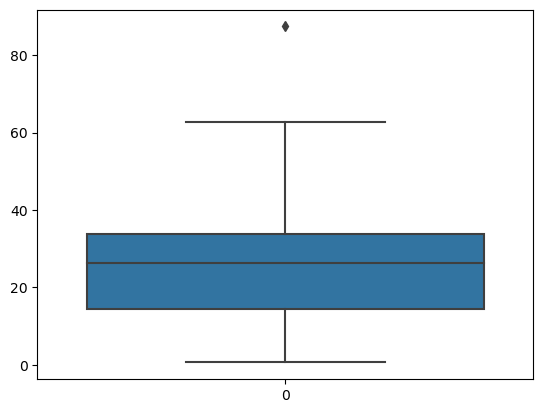

In [5]:
sns.boxplot(df.A1)

In [6]:
q1 = df.A1.quantile(0.25)
q3 = df.A1.quantile(0.75)
IQR = q3-q1
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
df = df[df.A1<upper_limit]

<Axes: >

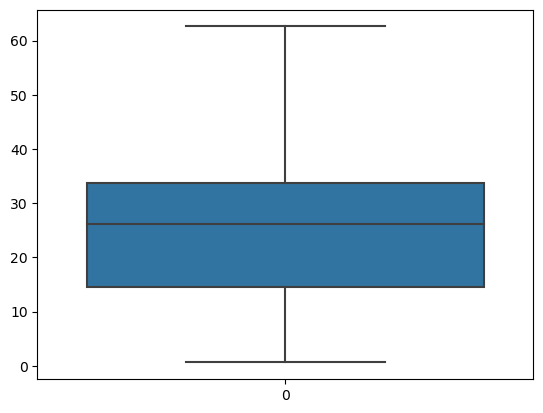

In [7]:
sns.boxplot(df.A1)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Timestamp'].values.reshape(-1, 1),
    df['A1'].values,
    test_size=0.2,
    random_state=42
)

In [9]:
# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2'
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

In [10]:
# Build and train the RandomForestRegressor with the best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

best_rf_model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'google.colab'

In [11]:
# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)


In [12]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 7.327271528100879


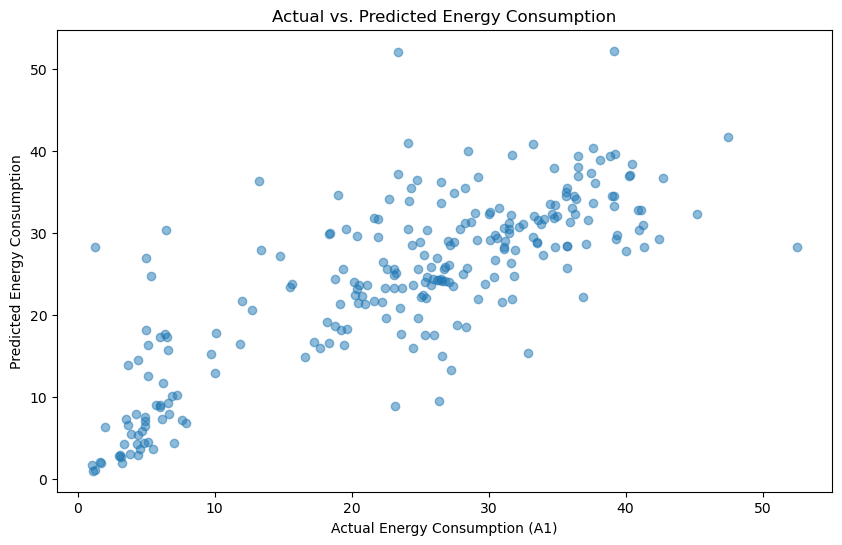

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Energy Consumption (A1)")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs. Predicted Energy Consumption")
plt.show()

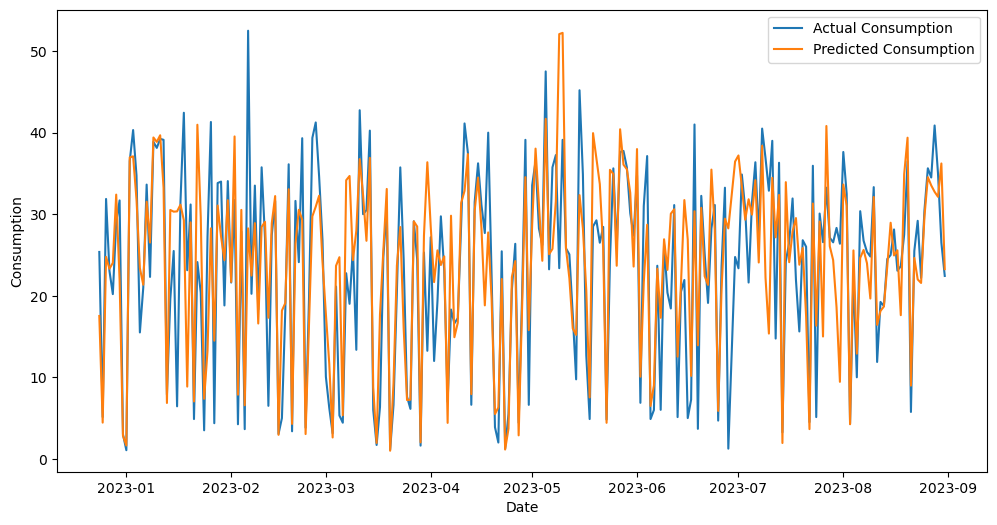

In [14]:
# Plot the actual vs. predicted consumption
plt.figure(figsize=(12, 6))
plt.plot(df['DT'].iloc[-len(y_test):], y_test, label='Actual Consumption')
plt.plot(df['DT'].iloc[-len(y_test):], y_pred, label='Predicted Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

In [15]:
Consumption=pd.DataFrame({"Actual_Consumption":y_test.reshape(-1, ),"Predicted _Consumption":y_pred.reshape(-1, )})
Consumption

,Actual_Consumption,Predicted _Consumption
0,25.37,17.519004
1,5.13,4.441863
2,31.87,24.765420
3,23.06,23.308468
4,20.20,24.031806
...,...,...
245,34.50,33.528474
246,40.88,32.745470
247,35.00,32.132447
248,26.50,36.221466


In [24]:
# Specify the "new_date" for which you want to make a prediction
new_date = "2026-03-08"  # Replace this with your desired date and time

# Convert the "new_date" to a timestamp
new_timestamp = pd.to_datetime(new_date).timestamp()

scaled_new_timestamp = np.array(new_timestamp).reshape(-1, 1)

# Make a prediction for the scaled new_timestamp
predicted_consumption = best_rf_model.predict(scaled_new_timestamp.reshape(1, -1))

predicted_consumption

array([37.15056111])